### bit.ly/apssdc-git

In [2]:
path = 'https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Clustering/Cust_Segmentation.csv'

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(path)

In [6]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [7]:
df.shape

(850, 10)

In [9]:
df['Address'].value_counts()

NBA001    71
NBA002    71
NBA000    60
NBA004    58
NBA003    55
NBA006    50
NBA008    49
NBA009    45
NBA005    43
NBA007    41
NBA010    37
NBA011    36
NBA012    28
NBA014    24
NBA013    22
NBA016    22
NBA017    20
NBA015    18
NBA019    16
NBA018    14
NBA023    11
NBA026    10
NBA021    10
NBA025     9
NBA022     9
NBA020     8
NBA024     4
NBA027     4
NBA031     2
NBA029     1
NBA034     1
NBA030     1
Name: Address, dtype: int64

In [10]:
df.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [11]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [12]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [17]:
df.fillna(0.0, inplace = True)

In [18]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,0.0,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,0.0,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [19]:
df.drop('Customer Id', axis = 'columns', inplace = True)

In [22]:
df.drop('DebtIncomeRatio', axis = 'columns', inplace = True)

In [23]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address
0,41,2,6,19,0.124,1.073,0.0,NBA001
1,47,1,26,100,4.582,8.218,0.0,NBA021
2,33,2,10,57,6.111,5.802,1.0,NBA013
3,29,2,4,19,0.681,0.516,0.0,NBA009
4,47,1,31,253,9.308,8.908,0.0,NBA008


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lbc = LabelEncoder()

In [27]:
df['Address'] = lbc.fit_transform(df['Address'])

In [28]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address
0,41,2,6,19,0.124,1.073,0.0,1
1,47,1,26,100,4.582,8.218,0.0,21
2,33,2,10,57,6.111,5.802,1.0,13
3,29,2,4,19,0.681,0.516,0.0,9
4,47,1,31,253,9.308,8.908,0.0,8


In [29]:
import seaborn as sns

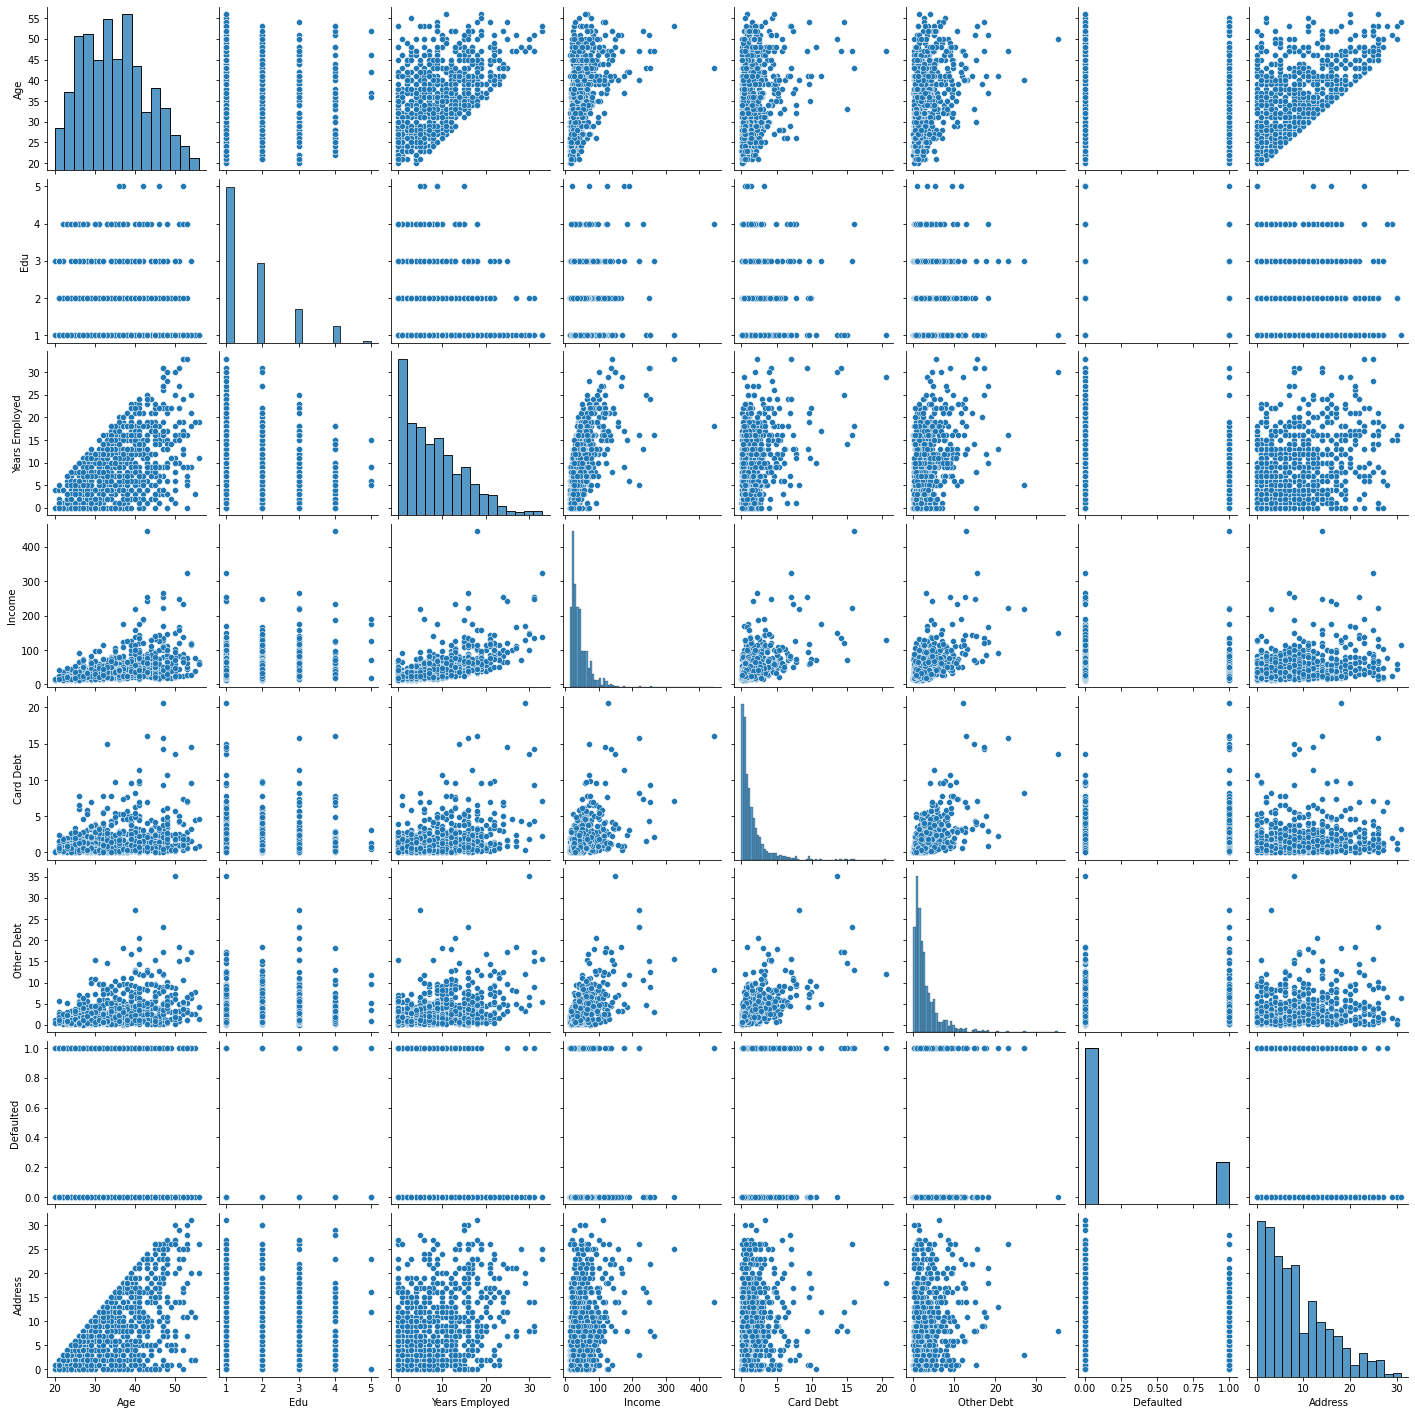

In [30]:
sns.pairplot(df)

In [31]:
df.corr()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address
Age,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.131556,0.599670
Edu,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.107925,0.052576
Years Employed,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.258410,0.344881
Income,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.074274,0.308561
Card Debt,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.208829,0.161510
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.120902,0.185851
Defaulted,-0.131556,0.107925,-0.258410,-0.074274,0.208829,0.120902,1.000000,-0.150757
Address,0.599670,0.052576,0.344881,0.308561,0.161510,0.185851,-0.150757,1.000000


In [32]:
from sklearn.cluster import KMeans

In [33]:
model = KMeans(n_clusters=3)

In [34]:
model.fit(df)

KMeans(n_clusters=3)

In [36]:
df['cluster'] = model.predict(df)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,cluster
0,41,2,6,19,0.124,1.073,0.0,1,2
1,47,1,26,100,4.582,8.218,0.0,21,0
2,33,2,10,57,6.111,5.802,1.0,13,2
3,29,2,4,19,0.681,0.516,0.0,9,2
4,47,1,31,253,9.308,8.908,0.0,8,1


In [37]:
df.groupby('cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address
cluster,,,,,,,,
0,41.351351,1.956757,15.232432,83.627027,3.077097,5.726276,0.135135,11.254054
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.222222,16.166667
2,32.933539,1.613601,6.353941,31.088099,1.033728,2.103968,0.238022,7.319938


In [38]:
import matplotlib.pyplot as plt

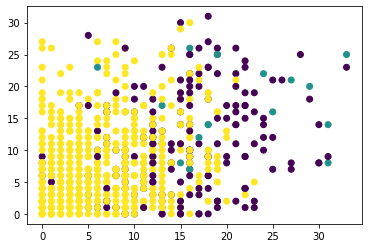

In [40]:
plt.scatter(df['Years Employed'], df['Address'], c = df['cluster'])

### ECE

61, 65, 58, 48, 47, 32, 18, 46, 15, 68, 57, 2, 10, 52, 


### CSE

12, 19, 4, 7, 41, 39, 36, 38, 28, 68, 69, 50, 46, 24, 25, 8, I61, 52, 22, 66, 5, 17, 10, 53, 47, 45, 29, 20, 11, 37, 30, 63, 34, 35, 67, 57, 3, 27, 55, 49


ECE 1-58, L61-L68
CSE 2-60, I61, L61-L69